In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


2023-10-17 23:48:43.510071: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 23:48:44.078038: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-17 23:48:44.078112: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-17 23:48:44.081013: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-17 23:48:44.354639: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 23:48:44.356941: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 [==============================] - 7s 1us/step


In [3]:
# Create a Sequential model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


2023-10-17 23:49:13.678277: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Train the model
model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=5)


Epoch 1/5


2023-10-17 23:49:31.005141: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 49s 25ms/step - loss: 0.1279 - accuracy: 0.9604
Epoch 2/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0425 - accuracy: 0.9867
Epoch 3/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0293 - accuracy: 0.9908
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0205 - accuracy: 0.9936
Epoch 5/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0160 - accuracy: 0.9947


In [6]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print(f"Test accuracy: {test_acc}")


2023-10-17 23:54:05.363094: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 3s 8ms/step - loss: 0.0281 - accuracy: 0.9911
Test accuracy: 0.991100013256073


In [7]:
# Make predictions on new data
predictions = model.predict(x_test.reshape(-1, 28, 28, 1))

# You can use `predictions` to see the model's predictions for the test data


  1/313 [..............................] - ETA: 36s

2023-10-17 23:54:15.965360: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 3s 8ms/step


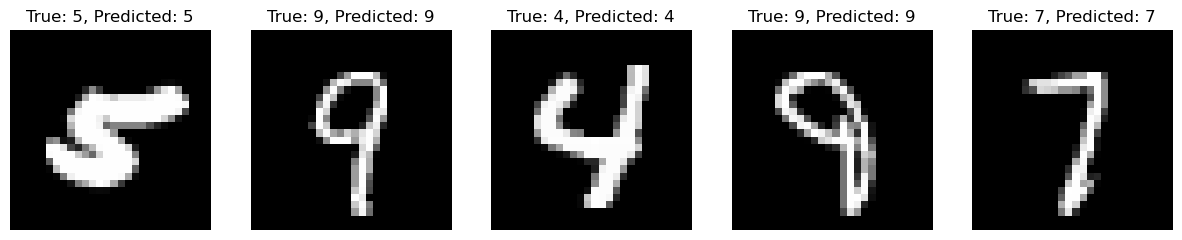

In [9]:
# Choose a few random single-digit test images to visualize
num_single_digit_images = 5
single_digit_indices = [i for i, label in enumerate(y_test) if label < 10]
sample_single_digit_indices = np.random.choice(single_digit_indices, num_single_digit_images)

# Plot the single-digit test images and their predictions
plt.figure(figsize=(15, 3))
for i, sample_idx in enumerate(sample_single_digit_indices):
    test_image = x_test[sample_idx]
    true_label = y_test[sample_idx]
    predicted_label = np.argmax(predictions[sample_idx])

    plt.subplot(1, num_single_digit_images, i + 1)
    plt.imshow(test_image, cmap='gray')
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')

plt.show()


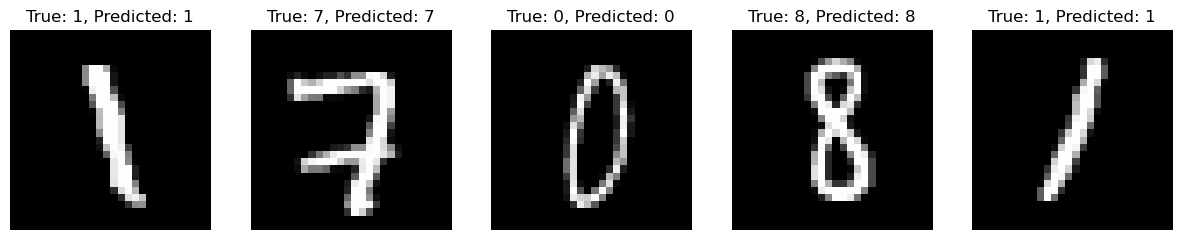

In [12]:
# Choose a few random single-digit test images to visualize
num_single_digit_images = 5
single_digit_indices = [i for i, label in enumerate(y_test) if label < 10]
sample_single_digit_indices = np.random.choice(single_digit_indices, num_single_digit_images)

# Plot the single-digit test images and their predictions
plt.figure(figsize=(15, 3))
for i, sample_idx in enumerate(sample_single_digit_indices):
    test_image = x_test[sample_idx]
    true_label = y_test[sample_idx]
    predicted_label = np.argmax(predictions[sample_idx])

    plt.subplot(1, num_single_digit_images, i + 1)
    plt.imshow(test_image, cmap='gray')
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')

plt.show()
